<a href="https://colab.research.google.com/github/jeanraice/NLP_SPAM_DETECTION/blob/main/NPL_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##mount the Drive. Because the dataset is on google drive

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import the dataset 

In [124]:
data_path_1 ='/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube01-Psy.csv'
data_path_2 = '/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv'
data_path_3 ='/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube03-LMFAO.csv'
data_path_4 ='/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube04-Eminem.csv'
data_path_5 ='/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube05-Shakira.csv'

In [125]:
import pandas as pd

data_1 = pd.read_csv(data_path_1)
data_2 = pd.read_csv(data_path_2)
data_3 = pd.read_csv(data_path_3)
data_4 = pd.read_csv(data_path_4)
data_5 = pd.read_csv(data_path_5)

dataset = pd.concat([data_1,data_2,data_3,data_4,data_5])

dataset

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [126]:
dataset.CLASS.value_counts(normalize = True)

1    0.513804
0    0.486196
Name: CLASS, dtype: float64

##Let's take in consideration the comment length in order to make a better prediction 

In [127]:
dataset['COMMENT_LENGTH'] = dataset['CONTENT'].apply(lambda x : len(x))
dataset

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,COMMENT_LENGTH
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39
...,...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0,58
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,93
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,3
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,23


##Let's take in consideration the rate of punctuation by sentence

In [128]:
import string 
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

##Function which permit to calculate the punctuation rate by sentence

In [129]:
 import string

 def punctuation_by_sentence(sentence):
   counter =0
   for ch in sentence :
     if ch in string.punctuation:
       counter = counter +1
    
   nb_carac = len(sentence)- sentence.count(' ')

   return counter/nb_carac

punctuation_by_sentence("je m'appelle john !!!!!<>")


0.36363636363636365

In [130]:
dataset['PUNCTUATION_RATE'] = dataset['CONTENT'].apply(lambda x:punctuation_by_sentence(x))
dataset.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,COMMENT_LENGTH,PUNCTUATION_RATE
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,0.081633
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,0.066667
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,0.032258
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0.078947
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,0.090909


##Let's check if the comment length can have any impact on our prediction

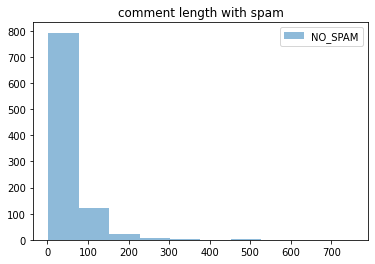

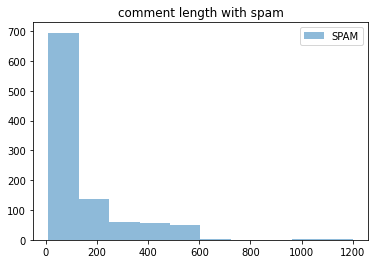

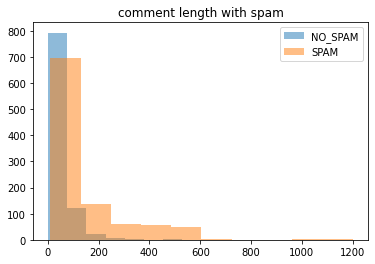

In [131]:
import matplotlib.pyplot as plt

plt.hist(dataset[dataset['CLASS']==0]['COMMENT_LENGTH'],alpha=0.5, label ='NO_SPAM')
plt.title('comment length with spam')
plt.legend()
plt.show()

plt.hist(dataset[dataset['CLASS']==1]['COMMENT_LENGTH'],alpha=0.5,label ='SPAM')
plt.legend()
plt.title('comment length with spam')
plt.show()

plt.hist(dataset[dataset['CLASS']==0]['COMMENT_LENGTH'],alpha=0.5, label ='NO_SPAM')
plt.hist(dataset[dataset['CLASS']==1]['COMMENT_LENGTH'],alpha=0.5,label ='SPAM')
plt.legend()
plt.title('comment length with spam')
plt.show()



#####As we can see on the histogram the comment length have a link with the comment class. We can see that the graphe we can see that the comment with more than 250 characters are generally a spam.

##Let's check if the punctuation rate can have any impact on our prediction 

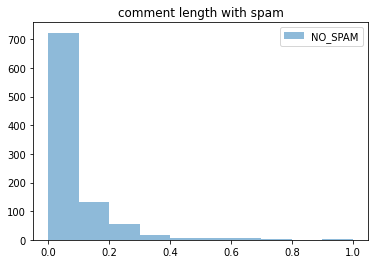

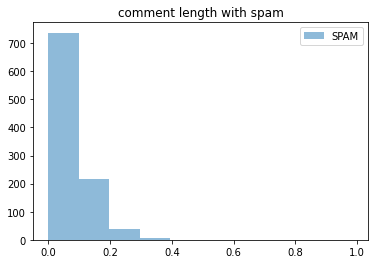

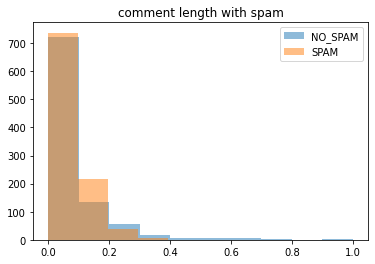

In [132]:
plt.hist(dataset[dataset['CLASS']==0]['PUNCTUATION_RATE'],alpha=0.5, label ='NO_SPAM')
plt.title('comment length with spam')
plt.legend()
plt.show()

plt.hist(dataset[dataset['CLASS']==1]['PUNCTUATION_RATE'],alpha=0.5,label ='SPAM')
plt.legend()
plt.title('comment length with spam')
plt.show()

plt.hist(dataset[dataset['CLASS']==0]['PUNCTUATION_RATE'],alpha=0.5, label ='NO_SPAM')
plt.hist(dataset[dataset['CLASS']==1]['PUNCTUATION_RATE'],alpha=0.5,label ='SPAM')
plt.title('comment length with spam')
plt.legend()
plt.show()


######As we can see the punctuction rate can't really help us to have a better prediction in this case. Because the both plot can be confused  

##Let's add a column names punctuation rate on our dataset

##Let's split our dataset in train and test dataset 

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    dataset[['CONTENT','COMMENT_LENGTH']],
    dataset['CLASS'],
    test_size= 0.2,
    random_state=10  ## is use for fixe our result. otherwise it will have a new result for each run

)
x_train

,CONTENT,COMMENT_LENGTH
321,i like the lyrics but not to music video﻿,41
109,I&#39;m A SUBSCRIBER﻿,21
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",84
5,Shuffle﻿,8
232,"I really can&#39;t comprehend Miley Cyrus , s...",244
...,...,...
255,Check out my remix to Tyga&#39;s - Molly ft. W...,72
206,Rihanna is so beautiful and amazing ♥♥♥♥♥love ...,92
177,https://www.facebook.com/pages/Hiphop-Express/...,96
11,i love song :)﻿,15


In [139]:
x_train.shape

(1564, 2)

In [140]:
y_test.shape

(392,)

## Let's tranform our dataset in array of token which will be used by sklearn algorithms for training 

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer()

x_train_vectorized = vectorize.fit_transform(x_train['CONTENT'])
x_test_vectorized = vectorize.transform(x_test['CONTENT'])
vectorize.get_feature_names_out()

array(['00', '000', '002', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

In [146]:
x_train_vectorized

<1564x3921 sparse matrix of type '<class 'numpy.int64'>'
	with 20678 stored elements in Compressed Sparse Row format>

###we need to add to our train dataset the comment length column data 

In [166]:
import pandas as pd 
x_train_data_frame = pd.DataFrame(
   x_train_vectorized.toarray(),
   columns =vectorize.get_feature_names_out()
)

x_train_final = pd.concat(
    [
    x_train['COMMENT_LENGTH'].reset_index(drop=True),
    x_train_data_frame
     ],
     axis =1
     
)
x_train_final.head()

,COMMENT_LENGTH,00,000,002,018,034,04,047000,05,053012,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,244,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
x_test_vectorized

<392x3921 sparse matrix of type '<class 'numpy.int64'>'
	with 4533 stored elements in Compressed Sparse Row format>

In [167]:
import pandas as pd 
x_test_data_frame = pd.DataFrame(
   x_test_vectorized.toarray(),
   columns =vectorize.get_feature_names_out()
)

x_test_final = pd.concat(
    [
    x_test['COMMENT_LENGTH'].reset_index(drop=True),
    x_test_data_frame
     ],
     axis =1
     
)
x_test_final.head()

,COMMENT_LENGTH,00,000,002,018,034,04,047000,05,053012,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,471,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
from sklearn.ensemble import RandomForestClassifier
rf_object=RandomForestClassifier(random_state=10)
fitted = rf_object.fit(x_train_final,y_train)


##Let's check the training report

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test,fitted.predict(x_test_final)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       201
           1       0.97      0.94      0.95       191

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



##Let's use cross_val to check the mean score.

In [170]:
from sklearn.model_selection import cross_val_score
accur =cross_val_score(fitted, x_test_final,y_test,cv=3)
print(accur)

[0.92366412 0.90839695 0.97692308]


In [171]:
accur.mean()

0.936328048541789

##We have an average score quite close to the score obtained previously

##let's test our algorithm with data that we enter manually 

In [184]:
comment='belle chanson'

import pandas as pd
data_to_use = pd.DataFrame(
    vectorize.transform([comment]).toarray(),
    columns =vectorize.get_feature_names_out()
)

In [194]:
comment='belle chanson'
import pandas as pd


data = pd.concat([
    
    pd.DataFrame({'COMMENT_LENGTH':[len(comment)]}),
    data_to_use
],
 axis =1)

In [195]:
fitted.predict(data)

array([0])

##Function for test manually if the comment you enter is a spam or a true comment 

In [206]:
def manually_test(comment):
  data= pd.concat([
        pd.DataFrame({'COMMENT_LENGTH':[len(comment)]}),
        pd.DataFrame(
        vectorize.transform([comment]).toarray(),
        columns =vectorize.get_feature_names_out())
        ],
       axis =1)
  
  if fitted.predict(data) == 0:

          print("c'est un commentaire")
  else :
         print("c'est un Spam")
   


In [207]:
manually_test("belle musique")

c'est un commentaire


#####By adding the comment length in our criteria to predict. We can see that our model accuracy has dropped a bit but it is still more efficient